In [ ]:
# mount gdrive

from google.colab import drive
drive.mount('/content/drive')

data_path = "/content/drive/My Drive/"

Mounted at /content/drive


In [ ]:
# import packages

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization, Conv2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from math import ceil
from IPython.display import display
from PIL import Image
import numpy as np
import tensorflow as tf

In [ ]:
# load data with shuffle and non-shuffle flows
# Final train note: adjust file path and batch size as needed

batch_size = 32

data = ImageDataGenerator(rescale=1. / 255,
                          shear_range=0.2,
                          zoom_range=0.2,
                          rotation_range=45, 
                          validation_split=0.2)

training_data = data.flow_from_directory('/content/drive/My Drive/archive/images/Images', 
                                         target_size=(224, 224), shuffle=True, batch_size = batch_size, 
                                         class_mode='categorical', subset='training')

training_data_noshuffle = data.flow_from_directory('/content/drive/My Drive/archive/images/Images', 
                                         target_size=(224, 224), shuffle=False, batch_size = batch_size, 
                                         class_mode='categorical', subset='training')

test_data = data.flow_from_directory('/content/drive/My Drive/archive/images/Images', 
                                     target_size=(224, 224), batch_size = batch_size, shuffle=False,
                                     class_mode='categorical', subset='validation')

numClasses = 120

Found 16604 images belonging to 120 classes.
Found 16604 images belonging to 120 classes.
Found 4096 images belonging to 120 classes.


In [ ]:
import time
start_time = time.time()

In [ ]:
# model architecture

cnn = tf.keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
cnn.trainable = False

flatten_layer = tf.keras.layers.Flatten()
dense_layer_1 = Dense(1024, activation='relu')
dense_layer_2 = Dense(786, activation='relu')
dense_layer_3 = Dense(345, activation='relu')
prediction_layer = Dense(120, activation='softmax')

Classifier = Sequential([
    cnn,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    dense_layer_3,
    prediction_layer
])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# compile and train
# Final train note: adjust MyEpochs to match homebrew CNNs, can adjust batch size as well if needed

MyEpochs = 50
opt = keras.optimizers.Adam()

Classifier.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt, 
              metrics=['accuracy']) 

Classifier.fit(training_data,
                        batch_size = 32,
                        epochs = MyEpochs,
                        validation_data=test_data,
                        shuffle = 1)

Epoch 1/50
519/519 [==============================] - 3949s 8s/step - loss: 4.5522 - accuracy: 0.0308 - val_loss: 4.1994 - val_accuracy: 0.0610
Epoch 2/50
519/519 [==============================] - 278s 537ms/step - loss: 3.9313 - accuracy: 0.0840 - val_loss: 3.7458 - val_accuracy: 0.1121
Epoch 3/50
519/519 [==============================] - 279s 537ms/step - loss: 3.4995 - accuracy: 0.1417 - val_loss: 3.5861 - val_accuracy: 0.1389
Epoch 4/50
519/519 [==============================] - 278s 537ms/step - loss: 3.2493 - accuracy: 0.1815 - val_loss: 3.4247 - val_accuracy: 0.1624
Epoch 5/50
519/519 [==============================] - 279s 537ms/step - loss: 3.1035 - accuracy: 0.2075 - val_loss: 3.3133 - val_accuracy: 0.1899
Epoch 6/50
519/519 [==============================] - 278s 537ms/step - loss: 2.9525 - accuracy: 0.2327 - val_loss: 3.1743 - val_accuracy: 0.2180
Epoch 7/50
519/519 [==============================] - 279s 538ms/step - loss: 2.8641 - accuracy: 0.2560 - val_loss: 3.2512 - v

In [ ]:
# architecture of layers

Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 786)               805650    
                                                                 
 dense_2 (Dense)             (None, 345)               271515    
                                                                 
 dense_3 (Dense)             (None, 120)               41520     
                                                                 
Total params: 41,524,509
Trainable params: 26,809,821
No

In [ ]:
# fine tuning
# Final train note: don't adjust any of these hyperparameters, keep as-is

cnn.trainable = True

Classifier.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.categorical_crossentropy,
    metrics=['Accuracy'],
)

MyEpochs = 10
Classifier.fit(training_data,
                        batch_size = 10,
                        epochs = MyEpochs,
                        validation_data=test_data,
                        shuffle = 1)

Classifier.save('VGG16.h5')

Epoch 1/10
519/519 [==============================] - 289s 540ms/step - loss: 1.5921 - Accuracy: 0.5436 - val_loss: 3.3562 - val_Accuracy: 0.2883
Epoch 2/10
519/519 [==============================] - 279s 538ms/step - loss: 1.4515 - Accuracy: 0.5734 - val_loss: 3.1598 - val_Accuracy: 0.3235
Epoch 3/10
519/519 [==============================] - 278s 535ms/step - loss: 1.3543 - Accuracy: 0.5987 - val_loss: 3.0156 - val_Accuracy: 0.3220
Epoch 4/10
519/519 [==============================] - 279s 537ms/step - loss: 1.2478 - Accuracy: 0.6301 - val_loss: 3.0235 - val_Accuracy: 0.3394
Epoch 5/10
519/519 [==============================] - 279s 538ms/step - loss: 1.1998 - Accuracy: 0.6421 - val_loss: 3.0796 - val_Accuracy: 0.3313
Epoch 6/10
519/519 [==============================] - 279s 537ms/step - loss: 1.1431 - Accuracy: 0.6569 - val_loss: 2.9914 - val_Accuracy: 0.3540
Epoch 7/10
519/519 [==============================] - 279s 537ms/step - loss: 1.0686 - Accuracy: 0.6708 - val_loss: 2.9925 -

In [ ]:
# model evaluation

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# confusion matrix, accuracy, classification report 

training_data.reset()
test_data.reset()

predicted_scores = Classifier.predict(test_data, verbose=1)
predicted_labels = predicted_scores.argmax(axis=1) 

test_labels = test_data.labels

print(test_labels)
print(predicted_labels)

acc_score = accuracy_score(test_labels, predicted_labels)
CFM = confusion_matrix(test_labels, predicted_labels)

print("\n", "Accuracy: " + str(format(acc_score,'.3f')))
print("\n", "CFM: \n", confusion_matrix(test_labels, predicted_labels))
print("\n", "Classification report: \n", classification_report(test_labels, predicted_labels))

128/128 [==============================] - 55s 430ms/step
[  0   0   0 ... 119 119 119]
[  0   7 101 ... 119 119 119]

 Accuracy: 0.367

 CFM: 
 [[ 7  0  0 ...  2  1  0]
 [ 0 19  0 ...  0  0  0]
 [ 0  1 29 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  6  0]
 [ 0  0  0 ...  4 18  0]
 [ 0  0  0 ...  0  1 21]]

 Classification report: 
               precision    recall  f1-score   support

           0       0.25      0.23      0.24        30
           1       0.53      0.51      0.52        37
           2       0.48      0.58      0.52        50
           3       0.23      0.21      0.22        29
           4       0.29      0.21      0.25        42
           5       0.52      0.35      0.42        37
           6       0.40      0.46      0.43        39
           7       0.24      0.35      0.29        34
           8       0.23      0.26      0.24        34
           9       0.39      0.43      0.41        47
          10       0.25      0.26      0.25        35
          11       0.46

Visualizations

In [ ]:
# Visual Specific Imports
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import (
    auc, 
    roc_curve,
    roc_auc_score,
)


ROC AUC score: 0.68


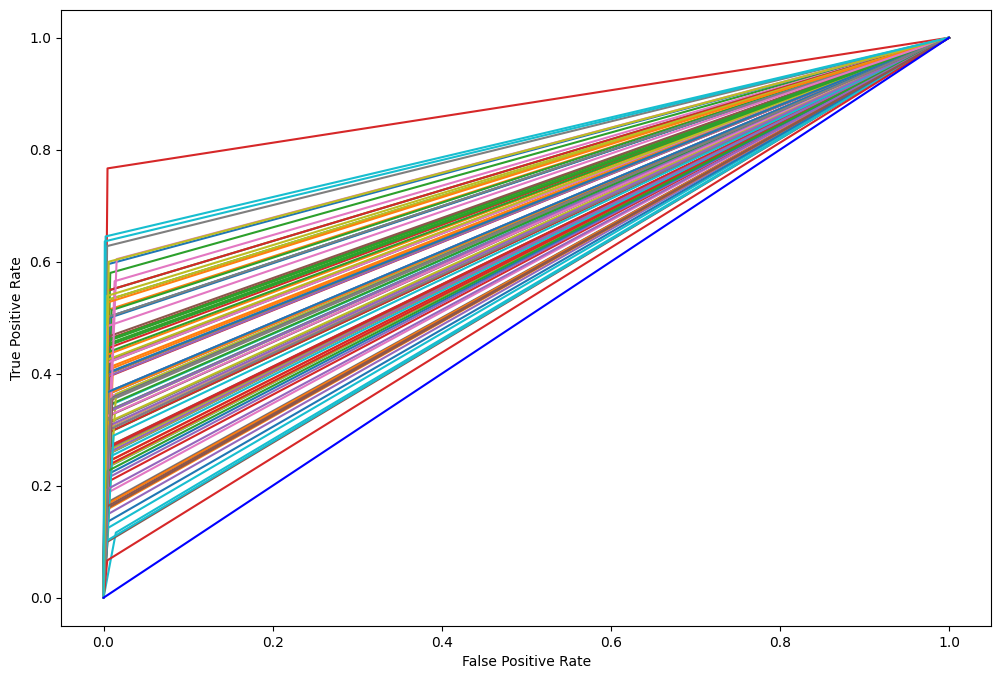

In [ ]:
# add visualization here
target = list(test_data.class_indices.keys())

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    auc_list = []
    auc_results_dict = {}

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
        
        auc_list += [auc(fpr, tpr)]

    # Create auc_results_df
    auc_results_dict['Breed'] = target
    auc_results_dict['AUC'] = auc_list
    index = range(len(auc_results_dict['Breed']))
    auc_results_df = pd.DataFrame(auc_results_dict, index=index)

    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')

    return roc_auc_score(y_test, y_pred, average=average), auc_results_df


# Set parameters here
roc_auc_score_result, auc_results_df = multiclass_roc_auc_score(test_labels, predicted_labels)
print('ROC AUC score:', round(roc_auc_score_result,2))

# c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [ ]:
classification_report_dict = classification_report(test_labels, predicted_labels, output_dict=True)

macro_avgs = {}
for i in range(3):
    key, value = classification_report_dict.popitem()
    macro_avgs[key] = value

index = range(len(classification_report_dict))
classification_report_df = pd.DataFrame(classification_report_dict).T
classification_report_df.index = classification_report_df.index.astype('int64')

class_results_df = auc_results_df.join(classification_report_df).sort_values('f1-score', ascending=False)

In [ ]:
df_macro_avgs = pd.DataFrame(macro_avgs).T.iloc[:2, :3]
print('Averages:')
display(round(df_macro_avgs,2))

Averages:


,precision,recall,f1-score
weighted avg,0.38,0.37,0.37
macro avg,0.38,0.36,0.36


Top and Bottom 5 by AUC

In [ ]:
print('Top 5 by AUC')
display(class_results_df.sort_values('AUC', ascending=False).head(5))
print('\n\nBottom 5 by AUC')
display(class_results_df.sort_values('AUC', ascending=True).head(5))

Top 5 by AUC


,Breed,AUC,precision,recall,f1-score,support
73,n02105056-groenendael,0.880997,0.547619,0.766667,0.638889,30.0
109,n02112350-keeshond,0.821351,0.666667,0.645161,0.655738,31.0
119,n02116738-African_hunting_dog,0.817443,0.777778,0.636364,0.700000,33.0
107,n02112018-Pomeranian,0.811856,0.613636,0.627907,0.620690,43.0
118,n02115913-dhole,0.796926,0.418605,0.600000,0.493151,30.0




Bottom 5 by AUC


,Breed,AUC,precision,recall,f1-score,support
113,n02113624-toy_poodle,0.531120,0.100000,0.066667,0.080000,30.0
85,n02107142-Doberman,0.547664,0.136364,0.100000,0.115385,30.0
89,n02107908-Appenzeller,0.549016,0.272727,0.100000,0.146341,30.0
19,n02090721-Irish_wolfhound,0.550861,0.078125,0.116279,0.093458,43.0
29,n02093428-American_Staffordshire_terrier,0.559670,0.148148,0.125000,0.135593,32.0


Top and Bottom 5 by F1-Score

In [ ]:
print('Top 5 by F1-Score')
display(class_results_df.sort_values('f1-score', ascending=False).head(5))
print('\n\nBottom 5 by F1-Score')
display(class_results_df.sort_values('f1-score', ascending=True).head(5))

Top 5 by F1-Score


,Breed,AUC,precision,recall,f1-score,support
119,n02116738-African_hunting_dog,0.817443,0.777778,0.636364,0.700000,33.0
109,n02112350-keeshond,0.821351,0.666667,0.645161,0.655738,31.0
73,n02105056-groenendael,0.880997,0.547619,0.766667,0.638889,30.0
107,n02112018-Pomeranian,0.811856,0.613636,0.627907,0.620690,43.0
103,n02111129-Leonberg,0.772206,0.638889,0.547619,0.589744,42.0




Bottom 5 by F1-Score


,Breed,AUC,precision,recall,f1-score,support
113,n02113624-toy_poodle,0.531120,0.100000,0.066667,0.080000,30.0
19,n02090721-Irish_wolfhound,0.550861,0.078125,0.116279,0.093458,43.0
85,n02107142-Doberman,0.547664,0.136364,0.100000,0.115385,30.0
29,n02093428-American_Staffordshire_terrier,0.559670,0.148148,0.125000,0.135593,32.0
89,n02107908-Appenzeller,0.549016,0.272727,0.100000,0.146341,30.0


In [ ]:
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds")

Elapsed time: 20831.44 seconds
